### Transform data for capturing meaningful relationship between the predictor and the response variables using centering, standardizing and logarithmic transformation.

In [1]:
install.packages(c('ggplo2', 'dplyr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplo2’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [2]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# **Centering**



In [3]:
# Loading the mtcars dataset
file = '/content/mtcars1.csv'
carData = read.csv(file, header = TRUE, row.names = 1, stringsAsFactors = FALSE)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: int  4 4 1 1 2 1 4 2 2 4 ...


In [4]:
# Converting categorical columns to represent factor levels
categorical_cols = c('cyl', 'vs', 'am', 'gear', 'carb')
carData[categorical_cols] = lapply(carData[categorical_cols], as.factor)
str(carData)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : Factor w/ 3 levels "4","6","8": 2 2 1 2 3 2 3 1 1 2 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ am  : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 1 1 ...
 $ gear: Factor w/ 3 levels "3","4","5": 2 2 2 1 1 1 1 2 2 2 ...
 $ carb: Factor w/ 6 levels "1","2","3","4",..: 4 4 1 1 2 1 4 2 2 4 ...


In [5]:
# adding a new column called hpc containing the mean centered hp values
carData$hpc = carData$hp - mean(carData$hp)
carData$hpc

[1] -36.6875 -36.6875 -53.6875 -36.6875  28.3125 -41.6875  98.3125 -84.6875
 [9] -51.6875 -23.6875 -23.6875  33.3125  33.3125  33.3125  58.3125  68.3125
[17]  83.3125 -80.6875 -94.6875 -81.6875 -49.6875   3.3125   3.3125  98.3125
[25]  28.3125 -80.6875 -55.6875 -33.6875 117.3125  28.3125 188.3125 -37.6875

Here, the -ve value indicates that the hp is approximately less than the average hp of all cars.

Similarly, the +ve value indicates that the hp is approximately more than the average hp of all cars.

In [6]:
# Fitting a SLRM for mpg as a function of hpc
# we are using hpc (centered horese power as the predictor)
model = lm(data = carData, mpg ~ hpc)
summary(model)


Call:
lm(formula = mpg ~ hpc, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 20.09062    0.68288  29.420  < 2e-16 ***
hpc         -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


If the input predictor value is exactly equal to the average of all the horse-power values in our dataset, then, the predicted mpg will be `20.09062` which is the average value of our `mpg`.

In [7]:
# Fitting a SLRM for mpg as a function of hp
model = lm(data = carData, mpg ~ hp)
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


As we can see the `B0hat` has been changed to 20.09062 from 30.09886.

This means that if the input predictor value is exactly equal to the average of all the hp values, then, the predicted mpg will be 20.09062.

In [10]:
mean(carData$mpg)

[1] 20.09062

**Centering mpg as mpgc**

In [8]:
# adding a new column called mpgc containing the centered mpg value
carData$mpgc = carData$mpg - mean(carData$mpg)
carData$mpgc

[1]  0.909375  0.909375  2.709375  1.309375 -1.390625 -1.990625 -5.790625
 [8]  4.309375  2.709375 -0.890625 -2.290625 -3.690625 -2.790625 -4.890625
[15] -9.690625 -9.690625 -5.390625 12.309375 10.309375 13.809375  1.409375
[22] -4.590625 -4.890625 -6.790625 -0.890625  7.209375  5.909375 10.309375
[29] -4.290625 -0.390625 -5.090625  1.309375

In [9]:
# Fitting a SLRM for mpg as a function of hpc
model = lm(data = carData, mpgc ~ hpc)
summary(model)


Call:
lm(formula = mpgc ~ hpc, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.511e-16  6.829e-01   0.000        1    
hpc         -6.823e-02  1.012e-02  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


The predicted centered mpg is simply `B1hat * hpc`

Here, we are not predicting mpg based on hp, but what the centered mpg would be(in respect to average of mpg in our dataset).

Cenetered miles per gallon will be predicted as:

`Yhat = B1hat - 6.823e-02 * hpc`

(If the centered hpc is 0, then the predicted centered mpg will also be 0.)

-------

# **Standardizing**

It used in oreder to get rid the effect of the units.

Here, we do the centering like above and in addition to that we also divide it by the standard deviation of the predictor values.

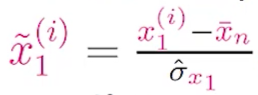

This is helpful typically in the multiple linear regression setup where different scales maybe present in the data.

# **Logarithmic Transformation**

If we build a model with response variables like height and weight, we cannot have a model predict the negative number using an SLRM.

So, one way to overcome this issue is to build an SLRM for logarithmically transformed response values:

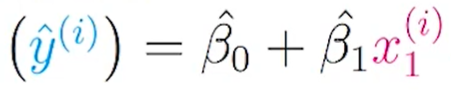es:

Changed to `logarithm of yhat of y`:

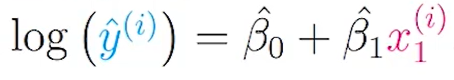

This takes care that yhat of y will always be +ve.

#### What is the interpretation of the B1hat now?

If it was not for logarithm, then 1 unit increase in the predictor value `x1` will result in `B1hat` change in the predicted value yhat.


So,
`B1hat` is not the corresponding change in the response variable but it is the coressponding proportional change in the response variable (relatilvely how much the new value far waya from the old value)

`B1hat is the proportionate change in the response value for a unit increase in the predictor value.`

If we increase the predictor value by 1 unit, the percentage change in the response value is the value of `B1hat * 100`.

In [12]:
# Add a new column called logmpg containing the log-transformed mpg values
carData$logmpg = log(carData$mpg)
carData$logmpg

[1] 3.044522 3.044522 3.126761 3.063391 2.928524 2.895912 2.660260 3.194583
 [9] 3.126761 2.954910 2.879198 2.797281 2.850707 2.721295 2.341806 2.341806
[17] 2.687847 3.478158 3.414443 3.523415 3.068053 2.740840 2.721295 2.587764
[25] 2.954910 3.306887 3.258097 3.414443 2.760010 2.980619 2.708050 3.063391

In [14]:
# old model
model = lm(data = carData, mpg ~ hp)
summary(model)


Call:
lm(formula = mpg ~ hp, data = carData)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7121 -2.1122 -0.8854  1.5819  8.2360 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 30.09886    1.63392  18.421  < 2e-16 ***
hp          -0.06823    0.01012  -6.742 1.79e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.863 on 30 degrees of freedom
Multiple R-squared:  0.6024,	Adjusted R-squared:  0.5892 
F-statistic: 45.46 on 1 and 30 DF,  p-value: 1.788e-07


In [13]:
# Fit a simple linear regression model for logmpg as a function of hp
model = lm(data = carData, logmpg ~ hp)
summary(model)


Call:
lm(formula = logmpg ~ hp, data = carData)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41577 -0.06583 -0.01737  0.09827  0.39621 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.4604669  0.0785838  44.035  < 2e-16 ***
hp          -0.0034287  0.0004867  -7.045 7.85e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1858 on 30 degrees of freedom
Multiple R-squared:  0.6233,	Adjusted R-squared:  0.6107 
F-statistic: 49.63 on 1 and 30 DF,  p-value: 7.853e-08


We see the coefficient for hp i.e., B1hat is `-0.0034287`. As our response is `logmpg`, we can say that if we increase hp by 1 unit, the precentage change in the mpg is `-0.0034287` multiplied by 100 (which is -0.3%).

## **In other words, the mpg relatively comes down by -0.3%.**